# 基於距離的相似性度量 

In [13]:
import numpy as np
import pandas as pd
from dtaidistance import dtw
import matplotlib.pyplot as plt

## 歐幾里得距離(Euclidean Distance)

In [16]:
def edu_dis(arr1,arr2):
    """compute euclidean distance matrix between two arrays"""
    dis = np.zeros((arr1.shape[0],arr2.shape[0]))
    length = len(arr2)
    for i in range(length):
        fun = lambda x: np.sqrt(sum(pow(x-arr2[i],2)))
        dis[:,i] = np.apply_along_axis(fun,1,arr1)
    return dis

## 動態時間規整(Dynamic Time Warping)

In [15]:
def dtw_dis(arr1,arr2):
    """計算DTW距離
    Return:
        dis[i,j]表示arr1的第j列向量與arr2的第i列向量距離
        dis[0,0]表示arr1的第0列向量與arr2的第0列向量距離
        dis[0,1]表示arr1的第1列向量與arr2的第0列向量距離
    """
    dis = np.zeros((arr1.shape[0],arr2.shape[0]))
    length = len(arr2)
    for i in range(length):
        fun = lambda x: dtw.distance_fast(x,arr2[i])
        dis[:,i] = np.apply_along_axis(fun,1,arr1)
    return dis

## 比較兩種距離度量差異 

### y1、y2左右平移關係，y1、y3則是上下平移。

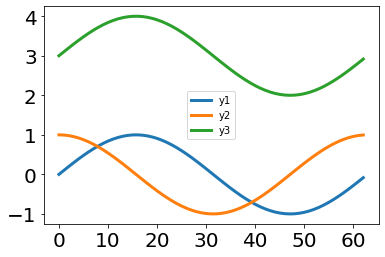

In [10]:
#繪圖
x=np.arange(0,np.pi*2,0.1)
y1=np.sin(x)
y2=np.cos(x)
y3 = y1+3
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(y1,lw=3)
plt.plot(y2,lw=3)
plt.plot(y3,lw=3)
labels = ["y1","y2","y3"]
plt.legend(labels)

In [17]:
x = np.array([y1,y2,y3])
y = np.array([y1,y2,y3])
edu = pd.DataFrame(edu_dis(x,y),index=[labels],columns=labels)
dtw = pd.DataFrame(dtw_dis(x,y),index=[labels],columns=labels)

print("="*15+"歐幾里得"+"="*15)
print(edu)
print("="*15+"動態時間規整"+"="*15)
print(dtw)

===============歐幾里得===============
           y1         y2         y3
y1   0.000000   7.938135  23.811762
y2   7.938135   0.000000  25.079147
y3  23.811762  25.079147   0.000000
===============動態時間規整===============
           y1         y2         y3
y1   0.000000   3.579437  23.482983
y2   3.579437   0.000000  23.157116
y3  23.482983  23.157116   0.000000


## 小結
DTW比較起ED更能匹配時間序列位移的問題。